# <a href="https://colab.research.google.com/github/GR-Tang/IBM-AI0403-Team3/blob/main/TelcoChurnV7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the libraries needed for fiddling with the dataset
import pixiedust
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
sns.set_theme(style="darkgrid")

In [3]:
#importing the necessary libraries for later
#!pip install imblearn
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from scipy.stats import sem
import graphviz

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [4]:
#getting the dataset and loading it up
raw_df=pixiedust.sampleData('https://raw.githubusercontent.com/GR-Tang/IBM-AI0403-Team3/main/telco-data.csv')

Downloaded 977501 bytes
Creating pandas DataFrame for 'https://raw.githubusercontent.com/GR-Tang/IBM-AI0403-Team3/main/telco-data.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://raw.githubusercontent.com/GR-Tang/IBM-AI0403-Team3/main/telco-data.csv'


In [5]:
#checking and verifying the dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#getting the headers to fiddle with the features
raw_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#can skip, for visualisation
#display(raw_df)

In [8]:
#can skip, for visualisation
#raw_df.groupby('Churn')[['MonthlyContract', 'OneYearContract', 'TwoYearContract']].sum()
#raw_df.groupby('Churn')[['PhoneService', 'MultipleLines', 'DeviceProtection']].sum()
#raw_df.groupby('Churn')[['InternetService', 'FiberOptic', 'DSL']].sum()
#raw_df.groupby('Churn')[['OnlineSecurity', 'OnlineBackup', 'TechSupport']].sum()
#raw_df.groupby('Churn')[['StreamingTV', 'StreamingMovies']].sum()
#raw_df.groupby('Churn')[['PayByBankTransfer', 'PayByCC', 'PayByElectronicCheque', 'PayByMailedCheque']].sum()

In [9]:
#one-hot codes in case needed
raw_df['SeniorCitizen']=raw_df['SeniorCitizen'].map({1:'Yes', 0:'No'})
raw_df['MultipleLines']=raw_df['MultipleLines'].map({'Yes':'Yes', 'No':'No','No phone service':'No'})
raw_df['OnlineSecurity']=raw_df['OnlineSecurity'].map({'Yes':'Yes', 'No':'No','No internet service':'No'})
raw_df['OnlineBackup']=raw_df['OnlineBackup'].map({'Yes':'Yes', 'No':'No','No internet service':'No'})
raw_df['DeviceProtection']=raw_df['DeviceProtection'].map({'Yes':'Yes', 'No':'No','No internet service':'No'})
raw_df['TechSupport']=raw_df['TechSupport'].map({'Yes':'Yes', 'No':'No','No internet service':'No'})
raw_df['StreamingTV']=raw_df['StreamingTV'].map({'Yes':'Yes', 'No':'No','No internet service':'No'})
raw_df['StreamingMovies']=raw_df['StreamingMovies'].map({'Yes':'Yes', 'No':'No','No internet service':'No'})
raw_df=pd.get_dummies(raw_df, columns=['gender','Partner', 'SeniorCitizen', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], dtype='int64')
#keeping Churn as binary class due to it being target feature
raw_df['Churn']=raw_df['Churn'].map({'Yes': 1, 'No': 0})
raw_df['TotalCharges']=raw_df['TotalCharges'].replace({' ':'0'}).astype(float)
raw_df.drop(columns=['customerID'], inplace = True)

In [10]:
#grouping tenure and monthlycharges into bins
raw_df['Bintenure']=(raw_df['tenure']/6).apply(np.ceil).astype("int64")
raw_df['BinMonthlyCharges']=(raw_df['MonthlyCharges']/10).apply(np.ceil).astype("int64")
raw_df['BinTotalCharges']=(raw_df['TotalCharges']/500).apply(np.ceil).astype("int64")

In [11]:
#shifting the target column to position 0 for ease of reference later
churn_df = raw_df['Churn']
raw_df.drop(columns=['Churn'], inplace = True)
raw_df.insert(0, 'Churn', churn_df)

In [12]:
#dropping unwanted columns
imbaldrop2bin_df= raw_df.drop(columns=['gender_Male', 'gender_Female','MonthlyCharges','TotalCharges','tenure'])
imbaldrop7bin_df=imbaldrop2bin_df.drop(columns=['PhoneService_Yes','PhoneService_No','StreamingTV_Yes','StreamingTV_No','StreamingMovies_Yes','StreamingMovies_No','MultipleLines_Yes','MultipleLines_No','BinTotalCharges'])

In [13]:
#noticed target data is imbalanced, we can either undersample (randomly reduce negatives to match the number of positives) 
#or oversample (randomly generate synthetic positives to match the number of negatives)
#however, almost all articles points to balancing after splitting into test/train sets. 
pd.value_counts(raw_df['Churn'])

0    5174
1    1869
Name: Churn, dtype: int64

In [14]:
#Selecting the CSV file to use
raw_df=imbaldrop7bin_df

In [15]:
#taking 10% of data as test data, the rest to train 
train_df, test_df = train_test_split(raw_df, test_size=0.1, stratify=raw_df['Churn'], random_state=55)

#printing to check size
print("Size of the training dataset = ", train_df.shape)
print("Size of the testing dataset = ", test_df.shape)

#show sample of the dataset to verify
print("\n\nSample of the training dataset \n")
train_df.head()

Size of the training dataset =  (6338, 29)
Size of the testing dataset =  (705, 29)


Sample of the training dataset 



,Churn,Partner_No,Partner_Yes,SeniorCitizen_No,SeniorCitizen_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Bintenure,BinMonthlyCharges
766,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,4,8
2054,1,1,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,5
1039,1,0,1,1,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,7,8
1814,0,0,1,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,2,2
1440,0,0,1,1,0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,2,2


In [16]:
pd.value_counts(train_df['Churn'])

0    4656
1    1682
Name: Churn, dtype: int64

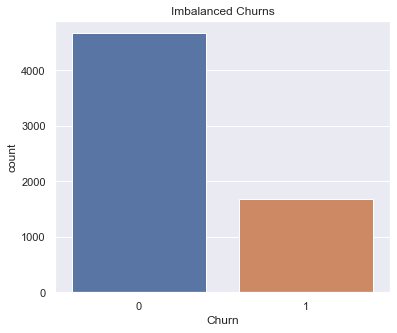

In [17]:
#plot and show the current imbalance
rcParams['figure.figsize'] = 6,5
sns.countplot(x='Churn', data=train_df)
plt.title('Imbalanced Churns')
plt.show()

#undersampling NOTE - Choose the one below or this, do not use both
#shuffle the Dataset. Everyday we're shuffling..shuffling... shuffling... (frac=1 means gimme back all the rows)
shuffled_df = train_df.sample(frac=1,random_state=555)

#pull out all the churn positives
churnPos_df = shuffled_df.loc[shuffled_df['Churn'] == 1]

#randomly pick 1682 rows from the ChurnNegatives (majority)
churnNeg_df = shuffled_df.loc[shuffled_df['Churn'] == 0].sample(n = 1682, random_state = 55)

#joining them back again
train_df = pd.concat([churnNeg_df, churnPos_df])


In [18]:
#oversampling NOTE - Choose the one above or this, do not use both
sm = SMOTE(sampling_strategy='auto', random_state=55)

oversam_train_X, oversam_train_Y = sm.fit_sample(train_df.drop('Churn', axis=1), train_df['Churn'])
train_df = pd.concat([pd.DataFrame(oversam_train_Y), pd.DataFrame(oversam_train_X)], axis=1)

In [19]:
pd.value_counts(train_df['Churn'])

0    4656
1    4656
Name: Churn, dtype: int64

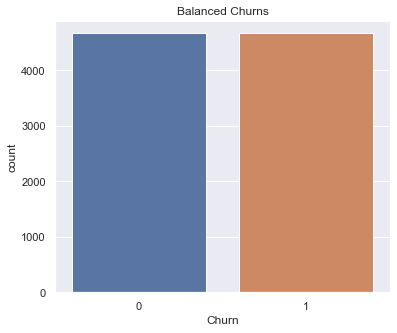

In [20]:
#Now plot and show the corrected balance
rcParams['figure.figsize'] = 6,5
sns.countplot(x='Churn', data=train_df)
plt.title('Balanced Churns')
plt.show()

In [21]:
#define target column for both test and train dataset
train_X, train_Y = train_df.iloc[:,1:],train_df.iloc[:,0]
test_X, test_Y = test_df.iloc[:,1:],test_df.iloc[:,0]

In [22]:
#selecting the model, parameters used for the first run is to suppress error messages
model1 = xgb.XGBClassifier(use_label_encoder=False, verbosity=0)

#fitting the model to the training dataset
model1.fit(train_X, train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [47]:
def assess_model(model, test_X, test_Y, folds):
    #calculating 
    model_preds = model.predict(test_X)
    accuracy = accuracy_score(test_Y, model_preds)
    model_probs = model.predict_proba(test_X)
    model_probs = model_probs[:, 1]
    model_auc = roc_auc_score(test_Y, model_probs)
    model_fpr, model_tpr, _ = roc_curve(test_Y, model_probs)
    model_precision, model_recall, _ = precision_recall_curve(test_Y, model_probs)
    model_f1 = f1_score(test_Y, model_preds)
    score = cross_val_score(model, train_X, train_Y, cv=folds, scoring='roc_auc')
 
    print('Model: %s\n' % (model))
    print((folds),'Folds Cross Validation ROC AUC Scores: ', (score))
    print('Mean ROC AUC score: {0:.3f} (+/-{1:.3f})'.format(np.mean(score), sem(score)))
    print('\nTest Set score:')
    print('Accuracy: %.2f' % (accuracy * 100.0))
    print('ROC AUC=%.3f' % (model_auc))
    print('F1=%.3f' % (model_f1))

    
    #plotting confusion matrix
    rcParams['figure.figsize'] = 6,5
    fig, ax = plt.subplots()
    cm = confusion_matrix(test_Y, model_preds)
    tp = cm[1,1]
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, ax = ax)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel("Predicted class")
    ax.set_ylabel("Actual class")
    plt.show()
    #plot roc/precision/recall
    rcParams['figure.figsize'] = 10,8
    plt.plot(model_fpr, model_tpr, marker='.', label='ROC')
    plt.plot(model_recall, model_precision, marker='.', label='Recall/Precision')
    plt.xlabel('Recall\nFalse Positive Rate')
    plt.ylabel('Precision\nTrue Positive Rate')
    plt.legend()
    plt.show()

    #plot feature importance (since we are only using two models, using try/except)
    rcParams['figure.figsize'] = 5,5
    try:
        xgb.plot_importance(model)
    except:
        lgbm.plot_importance(model)
    plt.show()

#visualising the decision tree for shits and giggles
rcParams['figure.figsize'] = 30,40
xgb.plot_tree(model1, rankdir='LR')
plt.show()

#calculate mean square error, not sure if useful for binary classification, included for fun 
#MSE = np.sqrt(mean_squared_error(test_Y, xgb1_pred_Y))
#print("XGBoost1 MSE: %f" % (MSE))

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

3 Folds Cross Validation ROC AUC Scores:  [0.84153387 0.96021595 0.9721483 ]
Mean ROC AUC score: 0.925 (+/-0.042)

Test Set score:
Accuracy: 76.74
ROC AUC=0.826
F1=0.577


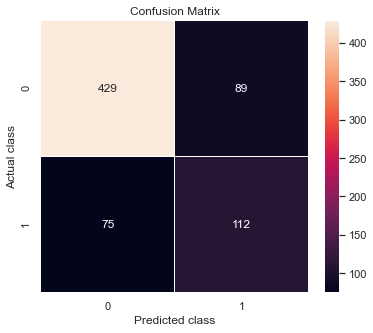

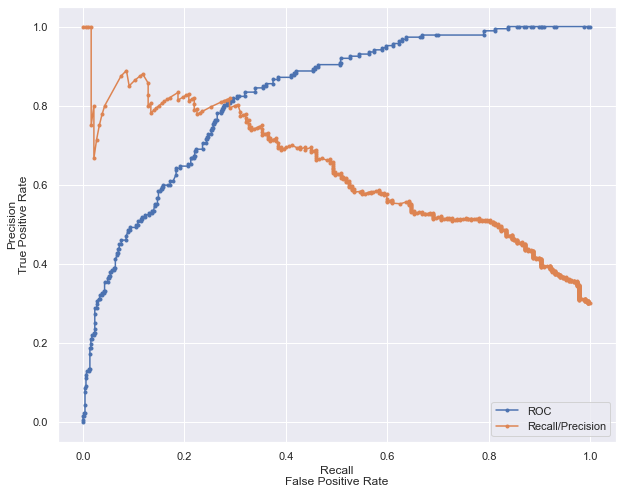

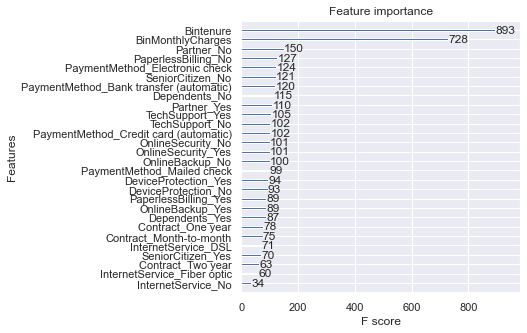

In [24]:
assess_model(model1,test_X,test_Y,3)

In [25]:
#this will take very very long (bob marley:"I've been watching you~~") to run due to the various combinations
#thought of increasing cores used but refrained, for portability

model2 = xgb.XGBClassifier(use_label_encoder=False, verbosity=0)

param_grid = {'eta':[0.1, 0.2, 0.3, 0.4, 0.5],
              'min_child_weight':[1, 2, 3, 4, 5],
              'max_depth':[3, 4, 5, 6, 7],
              'gamma':[0, 3, 6, 9, 12],
              'subsample':[0, 0.25, 0.5, 0.75, 1]
}

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=55)
grid_search = GridSearchCV(model2, param_grid, scoring='roc_auc', cv=kfold)
grid_result = grid_search.fit(train_X, train_Y)

# summarize results
print("Best ROC AUC: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("ROC AUC %f (%f) with: %r" % (mean, stdev, param))

Best ROC AUC: 0.928734 using {'eta': 0.1, 'gamma': 3, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.75}
ROC AUC 0.500000 (0.000000) with: {'eta': 0.1, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0}
ROC AUC 0.916301 (0.005272) with: {'eta': 0.1, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.25}
ROC AUC 0.918342 (0.005250) with: {'eta': 0.1, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.5}
ROC AUC 0.917892 (0.004149) with: {'eta': 0.1, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.75}
ROC AUC 0.917908 (0.004766) with: {'eta': 0.1, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1}
ROC AUC 0.500000 (0.000000) with: {'eta': 0.1, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0}
ROC AUC 0.916887 (0.005244) with: {'eta': 0.1, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.25}
ROC AUC 0.918403 (0.004939) with: {'eta': 0.1, 'gamma': 0, 'max_depth': 3, 'min

ROC AUC 0.914735 (0.002833) with: {'eta': 0.5, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.5}
ROC AUC 0.917901 (0.004518) with: {'eta': 0.5, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.75}
ROC AUC 0.919972 (0.002932) with: {'eta': 0.5, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 1}
ROC AUC 0.500000 (0.000000) with: {'eta': 0.5, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0}
ROC AUC 0.909786 (0.004897) with: {'eta': 0.5, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.25}
ROC AUC 0.914786 (0.004654) with: {'eta': 0.5, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.5}
ROC AUC 0.917948 (0.004312) with: {'eta': 0.5, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.75}
ROC AUC 0.918302 (0.005060) with: {'eta': 0.5, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 1}
ROC AUC 0.500000 (0.000000) with: {'eta': 0.5, 'gamma': 0, 'max_depth': 5, 

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=3,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

3 Folds Cross Validation ROC AUC Scores:  [0.85045734 0.95787942 0.97000898]
Mean ROC AUC score: 0.926 (+/-0.038)

Test Set score:
Accuracy: 78.01
ROC AUC=0.835
F1=0.599


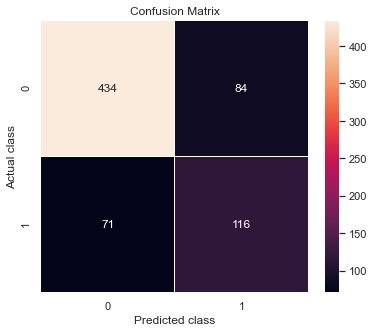

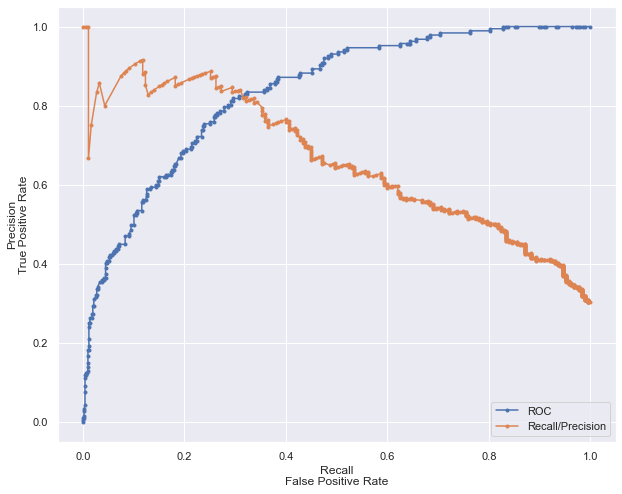

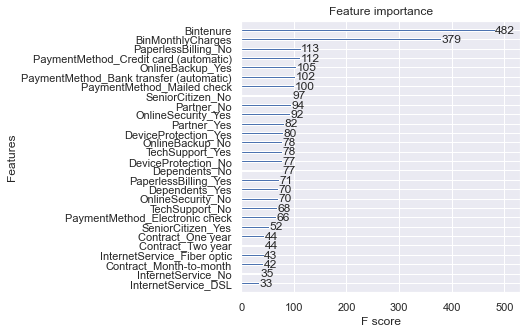

In [26]:
#Refit the model with new optimised parameters
model3 = xgb.XGBClassifier(use_label_encoder=False, verbosity=0, **grid_result.best_params_)

#fitting the model to the training dataset
model3.fit(train_X, train_Y)

#assess the model with optimised parameters
assess_model(model3,test_X,test_Y,3)

In [45]:
#importing LGBM model as alternative, uncomment line two if lgbm is not installed
#!pip install lightgbm
from lightgbm import LGBMClassifier
import lightgbm as lgbm

In [37]:
#selecting the alternative model and fitting it with train data, using default params 
model4 = LGBMClassifier()
model4.fit(train_X, train_Y)

LGBMClassifier()

Model: LGBMClassifier()

3 Folds Cross Validation ROC AUC Scores:  [0.85064977 0.96046214 0.97123225]
Mean ROC AUC score: 0.927 (+/-0.039)

Test Set score:
Accuracy: 79.01
ROC AUC=0.833
F1=0.608


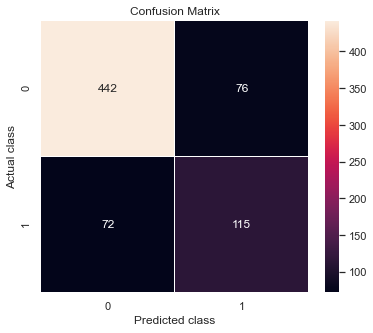

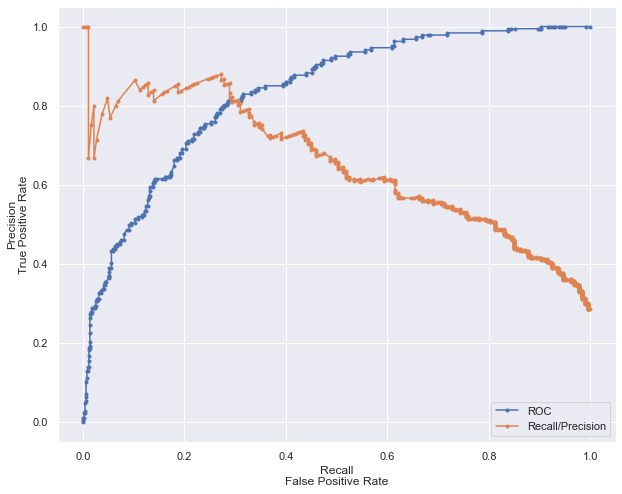

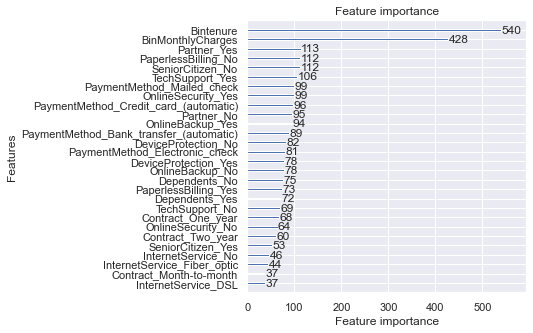

In [48]:
#assess the default LGBM model to get a baseline scoring
assess_model(model4,test_X,test_Y,3)

In [53]:
#perform gridsearchcv LGBM model using a few parameters, 
#this process takes very long since it will run all the possible different combinations of the parameters

model5 = LGBMClassifier()

param_grid = {'boosting_type':['gbdt', 'rf'],
              'learning_rate':[0.025, 0.050, 0.075, 0.1, 0.2],
              'num_leaves':[11, 21, 31, 41, 51],
              'max_depth':[0, 3, 6, 9, 12],
              'n_estimators':[80, 90, 100, 110, 120],
              'subsample':[0, 0.25, 0.5, 0.75, 1]
}

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=55)
grid_search = GridSearchCV(model2, param_grid, scoring='roc_auc', cv=kfold)
grid_result = grid_search.fit(train_X, train_Y)

# summarize results
print("Best ROC AUC: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("ROC AUC %f (%f) with: %r" % (mean, stdev, param))

Best ROC AUC: 0.928324 using {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 110, 'num_leaves': 11, 'subsample': 1}
ROC AUC 0.500000 (0.000000) with: {'boosting_type': 'gbdt', 'learning_rate': 0.025, 'max_depth': 0, 'n_estimators': 80, 'num_leaves': 11, 'subsample': 0}
ROC AUC 0.500000 (0.000000) with: {'boosting_type': 'gbdt', 'learning_rate': 0.025, 'max_depth': 0, 'n_estimators': 80, 'num_leaves': 11, 'subsample': 0.25}
ROC AUC 0.500000 (0.000000) with: {'boosting_type': 'gbdt', 'learning_rate': 0.025, 'max_depth': 0, 'n_estimators': 80, 'num_leaves': 11, 'subsample': 0.5}
ROC AUC 0.500000 (0.000000) with: {'boosting_type': 'gbdt', 'learning_rate': 0.025, 'max_depth': 0, 'n_estimators': 80, 'num_leaves': 11, 'subsample': 0.75}
ROC AUC 0.500000 (0.000000) with: {'boosting_type': 'gbdt', 'learning_rate': 0.025, 'max_depth': 0, 'n_estimators': 80, 'num_leaves': 11, 'subsample': 1}
ROC AUC 0.500000 (0.000000) with: {'boosting_type': 'gbdt', 'learning_rate

ROC AUC 0.918040 (0.004766) with: {'boosting_type': 'gbdt', 'learning_rate': 0.2, 'max_depth': 12, 'n_estimators': 120, 'num_leaves': 41, 'subsample': 0.5}
ROC AUC 0.918270 (0.003850) with: {'boosting_type': 'gbdt', 'learning_rate': 0.2, 'max_depth': 12, 'n_estimators': 120, 'num_leaves': 41, 'subsample': 0.75}
ROC AUC 0.918041 (0.003619) with: {'boosting_type': 'gbdt', 'learning_rate': 0.2, 'max_depth': 12, 'n_estimators': 120, 'num_leaves': 41, 'subsample': 1}
ROC AUC 0.500000 (0.000000) with: {'boosting_type': 'gbdt', 'learning_rate': 0.2, 'max_depth': 12, 'n_estimators': 120, 'num_leaves': 51, 'subsample': 0}
ROC AUC 0.916108 (0.006281) with: {'boosting_type': 'gbdt', 'learning_rate': 0.2, 'max_depth': 12, 'n_estimators': 120, 'num_leaves': 51, 'subsample': 0.25}
ROC AUC 0.918040 (0.004766) with: {'boosting_type': 'gbdt', 'learning_rate': 0.2, 'max_depth': 12, 'n_estimators': 120, 'num_leaves': 51, 'subsample': 0.5}
ROC AUC 0.918270 (0.003850) with: {'boosting_type': 'gbdt', 'learn

ROC AUC 0.923104 (0.003711) with: {'boosting_type': 'rf', 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 120, 'num_leaves': 11, 'subsample': 0.25}
ROC AUC 0.925715 (0.004000) with: {'boosting_type': 'rf', 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 120, 'num_leaves': 11, 'subsample': 0.5}
ROC AUC 0.926548 (0.004066) with: {'boosting_type': 'rf', 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 120, 'num_leaves': 11, 'subsample': 0.75}
ROC AUC 0.926640 (0.003975) with: {'boosting_type': 'rf', 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 120, 'num_leaves': 11, 'subsample': 1}
ROC AUC 0.500000 (0.000000) with: {'boosting_type': 'rf', 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 120, 'num_leaves': 21, 'subsample': 0}
ROC AUC 0.923104 (0.003711) with: {'boosting_type': 'rf', 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 120, 'num_leaves': 21, 'subsample': 0.25}
ROC AUC 0.925715 (0.004000) with: {'boosting_type': 'rf', 'learning_rate': 0.2, 'ma

In [56]:
#todo - fit lgbm model with optimised parameters 
model6 = LGBMClassifier(**grid_result.best_params_)
model6.fit(train_X, train_Y)

LGBMClassifier(max_depth=6, n_estimators=110, num_leaves=11, subsample=1)

Model: LGBMClassifier(max_depth=6, n_estimators=110, num_leaves=11, subsample=1)

3 Folds Cross Validation ROC AUC Scores:  [0.84698722 0.95744475 0.96746009]
Mean ROC AUC score: 0.924 (+/-0.039)

Test Set score:
Accuracy: 77.45
ROC AUC=0.836
F1=0.591


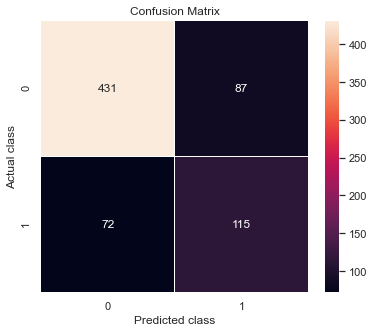

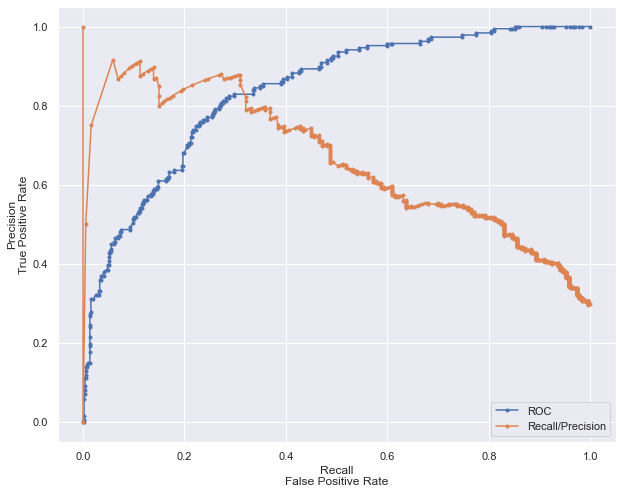

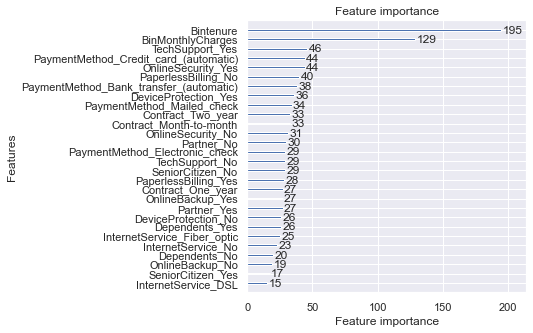

In [57]:
#todo - assess updated LGBM model with optimised parameters
assess_model(model6,test_X,test_Y,3)

In [31]:
#todo - deploy best model

#Prep for deployment
#IMPORTANT - READ BELOW:
#IMPORTANT - ALL CODES BELOW ARE FOR TECH DEMONSTRATION ONLY, DO NOT RUN. CELLS WILL BE MARK DOWN IN FUTURE VERSIONS.
#IMPORTANT - READ ABOVE
#!pip install ibm-watson-machine-learning
from ibm_watson_machine_learning import APIClient

#creating the login credentials and getting the IAM token from IBM Cloud
# @hidden_cell
api_key = "<removed>"
wml_credentials = {
    "apikey": api_key,
    "url": 'https://us-south.ml.cloud.ibm.com'
}
client = APIClient(wml_credentials)

#getting the list of spaces available on my cloud account
client.spaces.list()

#setting the space this client will be working on
client.set.default_space("163085a0-83fa-4fed-8c4e-07e486aa743c")

#verifying my own system environment
import sys
sys.version

#checking my package version
xgb.__version__

#getting a list of software specifications available on IBM cloud 
#do note that it's not fantastically compatible, maybe coz i'm on still a free account 
#free stuff is good stuff, at least for learning purposes
client.software_specifications.list()

#Storing the trained model in the cloud space together with the training data 
metadata = {
    client.repository.ModelMetaNames.NAME: 'Telco Churn Prediction Model',
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.22',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: "154010fa-5b3b-4ac1-82af-4d5ee5abbc85"
}
published_model = client.repository.store_model(
    model=model1,
    meta_props=metadata,
    training_data=train_X,
    training_target=train_Y)

#listing the stored model(s) in my repository
models_details = client.repository.list_models()

#selecting the stored model by UID and deploying it online
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deployment of Telco Churn Prediction Model",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create("8597546e-fac9-4cc4-99e0-ae5646f586cc", meta_props=metadata)

#listing the instances of deployed models
client.deployments.list()

#dumping some numbers into the deployed model for predictions
scoring_payload = {"input_data": [{"values": [[0,0,0,0,3,1,1,1,0,0,1,1,1,1,1,0,10,50,1,1,0,0,0,1,0,0]]}]}
predictions = client.deployments.score("7c6da0f0-ed51-4c0d-8434-0594b3024ca7", scoring_payload)